In [5]:
import mytrain_lib as ml
import mytrain_lib_cluster as mlcluster
import goalnets as gn
import importlib as il
import matplotlib.pyplot as plt
import json
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os

In [2]:
path_graphs     = 'F:\\TFG\\graphs\\summary\\'
path_logs       = 'F:\\TFG\\results\\logs\\'

In [3]:
execs = [
    'cdsm_4layers_10163params', 'nnbn32batch_10553params', 
    'nnbn_4layers_10553params_wdecay2.0', 'nnbn_4layers_10553params_wdecay0.5',
    'nndo_4layers_10163params_dropout0.05', 'nndo_4layers_10163params_dropout0.25',
    'varthr_4layers_8843params', 'nnbn_varthr_4layers_9233params', 
    'anova_4layers_8723params_anova10', 'nnbn_anova_4layers_9113params_anova10',
    'featsel_4layers_8963params', 'nnbn_featsel_4layers_9353params', 
    'pca_4layers_8723params_pca10', 'nnbn_pca_4layers_9113params_pca10'
        ]

colors = ['#E0DA28','#23DE3F','#DE7D0D','#9361E0','#DE0238',
                '#63B1E0','#818477','#DE82AE','#02366D' ,'#DEBD83','#159A75',
                '#857A77','#8E7AB7','#7E0054']

### All-vs-All

In [59]:
dict_execs = {ex:pd.read_csv(path_logs+ex+'_logs.csv',sep=';') for ex in execs}

##### Error

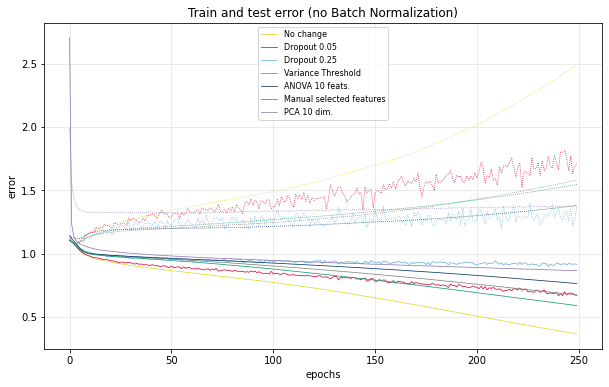

In [102]:
plt.figure(figsize=(10,6))

train_plts,test_plts = [],[]
labels = ['No change', 'Dropout 0.05', 'Dropout 0.25', 'Variance Threshold',
            'ANOVA 10 feats.', 'Manual selected features', 'PCA 10 dim.']

plt.title('Train and test error (no Batch Normalization)')
for ex,c in zip(execs,colors):
    if 'nnbn' not in ex:
        train_plts.append(plt.plot(dict_execs[ex].trainloss,c=c,linewidth=.75)[0])
        plt.plot(dict_execs[ex].testloss,linestyle=':',c=c,linewidth=.75)

plt.ylabel('error'), plt.xlabel('epochs')

plt.legend(handles=train_plts,labels=labels,fontsize=8)
plt.grid(alpha=.3)
plt.savefig(path_graphs + 'error_nobn_m4' + '.jpg', format='jpg', dpi=200, bbox_inches='tight')

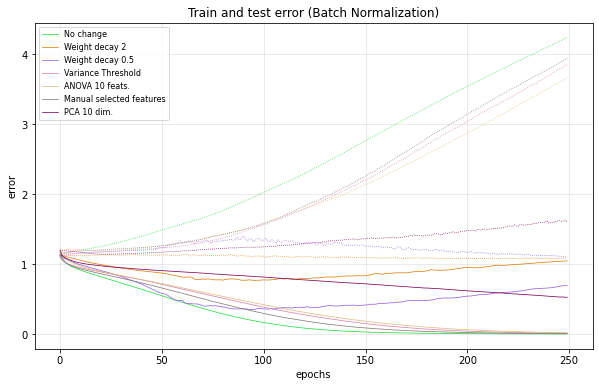

In [103]:
plt.figure(figsize=(10,6))

train_plts,test_plts = [],[]
labels = ['No change', 'Weight decay 2', 'Weight decay 0.5', 'Variance Threshold',
            'ANOVA 10 feats.', 'Manual selected features', 'PCA 10 dim.']

plt.title('Train and test error (Batch Normalization)')
for ex,c in zip(execs,colors):
    if 'nnbn' in ex:
        train_plts.append(plt.plot(dict_execs[ex].trainloss,c=c,linewidth=.75)[0])
        plt.plot(dict_execs[ex].testloss,linestyle=':',c=c,linewidth=.75)

plt.ylabel('error'), plt.xlabel('epochs')

plt.legend(handles=train_plts,labels=labels,fontsize=8)
plt.grid(alpha=.3)
plt.savefig(path_graphs + 'error_m4bn' + '.jpg', format='jpg', dpi=200, bbox_inches='tight')

##### Accuracy

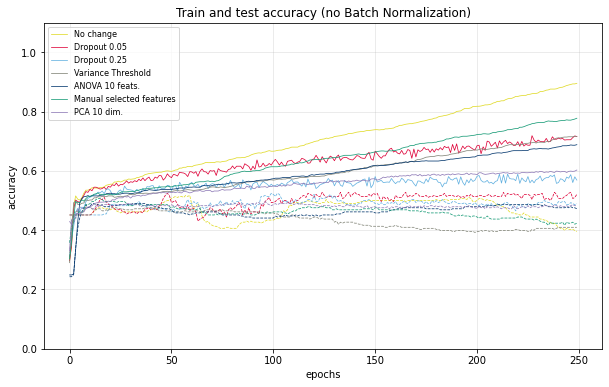

In [123]:
plt.figure(figsize=(10,6))

train_plts,test_plts = [],[]
labels = ['No change', 'Dropout 0.05', 'Dropout 0.25', 'Variance Threshold',
            'ANOVA 10 feats.', 'Manual selected features', 'PCA 10 dim.']

plt.title('Train and test accuracy (no Batch Normalization)')
for ex,c in zip(execs,colors):
    if 'nnbn' not in ex:
        train_plts.append(plt.plot(dict_execs[ex].acc_train,c=c,linewidth=.75)[0])
        plt.plot(dict_execs[ex].acc_test,linestyle='--',c=c,linewidth=.75)

plt.ylabel('accuracy'), plt.xlabel('epochs')
plt.ylim(0,1.1)
plt.legend(handles=train_plts,labels=labels,fontsize=8)
plt.grid(alpha=.3)
plt.savefig(path_graphs + 'accuracy_nobn_m4' + '.jpg', format='jpg', dpi=200, bbox_inches='tight')

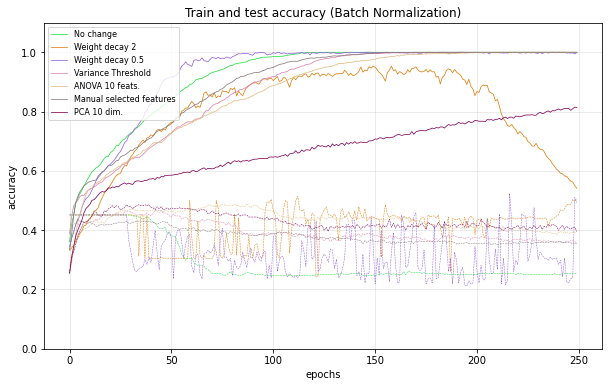

In [124]:
plt.figure(figsize=(10,6))

train_plts,test_plts = [],[]
labels = ['No change', 'Weight decay 2', 'Weight decay 0.5', 'Variance Threshold',
            'ANOVA 10 feats.', 'Manual selected features', 'PCA 10 dim.']

plt.title('Train and test accuracy (Batch Normalization)')
for ex,c in zip(execs,colors):
    if 'nnbn' in ex:
        train_plts.append(plt.plot(dict_execs[ex].acc_train,c=c,linewidth=.75)[0])
        plt.plot(dict_execs[ex].acc_test,linestyle='--',c=c,linewidth=.5)

plt.ylabel('accuracy'), plt.xlabel('epochs')

plt.legend(handles=train_plts,labels=labels,fontsize=8)
plt.grid(alpha=.3)
plt.ylim(0,1.1)
plt.savefig(path_graphs + 'accuracy_m4bn' + '.jpg', format='jpg', dpi=200, bbox_inches='tight')

### Batch Normalization, yes or no?

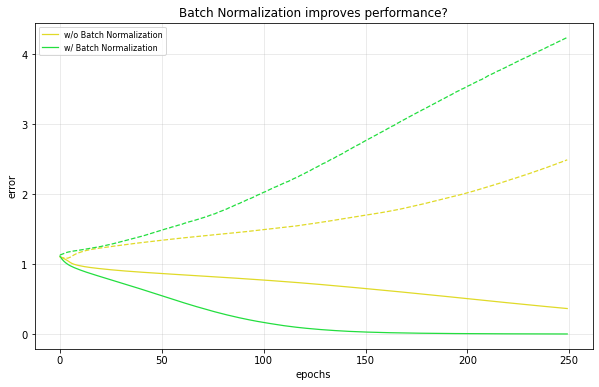

In [129]:
plt.figure(figsize=(10,6))

train_plts,test_plts = [],[]
labels = ['w/o Batch Normalization','w/ Batch Normalization']

plt.title('Batch Normalization improves performance?')
for ex,c in zip(execs[:2],colors):
    train_plts.append(plt.plot(dict_execs[ex].trainloss,c=c,linewidth=1.25)[0])
    plt.plot(dict_execs[ex].testloss,linestyle='--',c=c,linewidth=1.25)

plt.ylabel('error'), plt.xlabel('epochs')

plt.legend(handles=train_plts,labels=labels,fontsize=8)
plt.grid(alpha=.3)
plt.savefig(path_graphs + 'error_bn_yesno' + '.jpg', format='jpg', dpi=200, bbox_inches='tight')

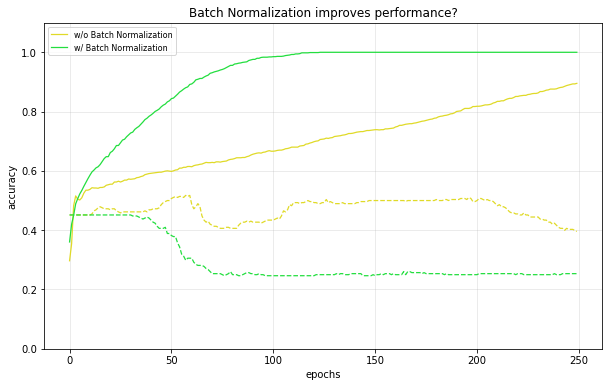

In [128]:
# accuracy

plt.figure(figsize=(10,6))

train_plts,test_plts = [],[]
labels = ['w/o Batch Normalization','w/ Batch Normalization']

plt.title('Batch Normalization improves performance?')
for ex,c in zip(execs[:2],colors):
    train_plts.append(plt.plot(dict_execs[ex].acc_train,c=c,linewidth=1.25)[0])
    plt.plot(dict_execs[ex].acc_test,linestyle='--',c=c,linewidth=1.25)

plt.ylabel('accuracy'), plt.xlabel('epochs')

plt.legend(handles=train_plts,labels=labels,fontsize=8)
plt.ylim(0,1.1)
plt.grid(alpha=.3)
plt.savefig(path_graphs + 'accuracy_bn_yesno' + '.jpg', format='jpg', dpi=200, bbox_inches='tight')

In [130]:
# relu -> should run again these two and save activations in a file

In [131]:
# Gradients -> should run again these two and save gradients in a file

#### Weights

In [4]:
with open(path_logs+execs[0]+'_wg.json') as wg:
    json.load(wg)['weights']

In [17]:
np.array(np.meshgrid(2,3,4,[2,3,4])).T.reshape(-1,4)

array([[2, 3, 4, 2],
       [2, 3, 4, 3],
       [2, 3, 4, 4]])

In [1]:
import numpy as np

In [25]:
r1 = np.random.randint(low=1,high=25,size=(250,3))
r2 = np.random.randint(low=1,high=50,size=(50,3))
r3 = np.random.randint(low=1,high=75,size=(75,3))
r4 = np.random.randint(low=1,high=100,size=(125,3))
r = np.concatenate([r1,r2,r3,r4])

In [26]:
r

array([[10, 17, 17],
       [ 3, 20, 18],
       [17, 14, 10],
       ...,
       [95, 35, 88],
       [54, 55,  8],
       [37, 85, 42]])